In [1]:
# Bibliotecas python
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados do arquivo CAGED
df_0 = pd.read_csv(
    fr"C:\Users\crist\Desktop\dados_caged.csv",
    sep =';',
    dtype = 'string', # forçar string em todas as colunas
    keep_default_na = False
)
# print(len(df_0))
# df.head(3)

# Carregar os dados do arquivo auxiliar
df_mun_list = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_mun',
    dtype='string'
)['Código'].tolist()

df_cbo_list = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_cbo',
    dtype='string'
)['Código'].tolist()

df_tipo_movimentacao = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_tipo_movimentacao',
    dtype='string'
)['Código'].tolist()

df_cnae_classe = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_cnae_sub',
    dtype='string'
)['Código'].str[:5].tolist()

df_cnae_sub = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_cnae_sub',
    dtype='string'
)['Código'].tolist()

df_familia = pd.read_excel(
    fr"C:\Users\crist\Desktop\Descrição_das_variáveis.xlsx",
    sheet_name = 'cd_cbo',
    dtype='string'
)['Código'].str[:4].tolist()

In [3]:
# ETL: Extração dos dados STEM
df = df_0[df_0['cd_cbo'].str[:2].isin(['20','21','22'])] # Dados STEM filtrados
# print(len(df))

In [4]:
# Visualização dos dados para melhor entendimento e validação dos dados
print('---')
print('LISTA VALORES (U) cd_uf') 
print(df.cd_uf.unique()) 
print('---')
print('LISTA VALORES (U) cd_mun')
print(df.cd_mun.unique())
print('TOTAL IGNORADO (U)',df[df.cd_mun == '429999'].cd_mun.nunique())
print('TOTAL INVÁLIDO (U)',df[~df['cd_mun'].isin(df_mun_list)].cd_mun.nunique())
print('---')
print('LISTA VALORES (U) dt_competencia')
print(df.dt_competencia.unique())
print('---')
print('LISTA VALORES (U) cd_admitidos_desligados')
print(df.cd_admitidos_desligados.unique())
print('---')
print('LISTA VALORES (U) cd_cbo')
print(df.cd_cbo.unique())
print('TOTAL INVÁLIDO (U)',df[~df['cd_cbo'].isin(df_cbo_list)].cd_cbo.nunique())
print('---')
print('LISTA VALORES (U) nr_horas')
print(df.nr_horas.unique())
#print(sorted(df.nr_horas.unique()))
print('TOTAL NA',len(df[df.nr_horas == 'NA']))
print('---')
print('LISTA VALORES (U) nr_salario')
print(df.nr_salario.unique())
#print(sorted(df.nr_salario.unique()))
print('TOTAL NA',len(df[df.nr_salario == 'NA']))
print('---')
print('LISTA VALORES (U) nr_saldo')
print(df.nr_saldo.unique())
print('TOTAL ERRO', len(df[df.nr_admitidos.astype('int')-df.nr_desligados.astype('int')!=df.nr_saldo.astype('int')]))
print('---')
print('LISTA VALORES (U) cd_tipo_movimentacao')
print(df.cd_tipo_movimentacao.unique())
print('INVÁLIDO (U)',df[~df['cd_tipo_movimentacao'].isin(df_tipo_movimentacao)].cd_mun.nunique())
print('---')
print('LISTA VALORES (U) cd_cnae_classe')
print(df.cd_cnae_classe.unique())
# print(sorted(df.cd_cnae_classe.unique()))
print('TOTAL INVÁLIDO',len(df[~df['cd_cnae_classe'].isin(df_cnae_classe)]))
# print(sorted(df[~df['cd_cnae_classe'].isin(df_cnae_classe)].cd_cbo.unique()))
print('---')
print('LISTA VALROES (U) fonte')
print(df.fonte.unique())
print('---')
print('LISTA VALORES (U) nr_admitidos')
print(df.nr_admitidos.unique())
print('---')
print('LISTA VALORES (U) nr_desligados')
print(df.nr_desligados.unique())
print('---')
print('LISTA VALORES (U) cd_cnae_sub')
print(df.cd_cnae_sub.unique())
print('TOTAL INVÁLIDO',len(df[~df['cd_cnae_sub'].isin(df_cnae_sub)]))
print('---')
print('LISTA VALORES (U) cd_familia')
print(df.cd_familia.unique())
print('TOTAL INVÁLIDO',len(df[~df['cd_familia'].isin(df_familia)]))

---
LISTA VALORES (U) cd_uf
<StringArray>
['42']
Length: 1, dtype: string
---
LISTA VALORES (U) cd_mun
<StringArray>
['420460', '420240', '420540', '420210', '421660', '420910', '420370',
 '420890', '420290', '420775',
 ...
 '420075', '421569', '421795', '420253', '420475', '420050', '420005',
 '421825', '420415', '420895']
Length: 276, dtype: string
TOTAL IGNORADO (U) 0
TOTAL INVÁLIDO (U) 0
---
LISTA VALORES (U) dt_competencia
<StringArray>
['202101', '202102', '202103', '202104', '202105', '202106', '202107',
 '202108', '202109', '202110', '202111', '202112', '202201', '202202',
 '202203', '202204', '202205', '202206', '202207', '202208', '202209',
 '202210', '202211', '202212']
Length: 24, dtype: string
---
LISTA VALORES (U) cd_admitidos_desligados
<StringArray>
['NA']
Length: 1, dtype: string
---
LISTA VALORES (U) cd_cbo
<StringArray>
['224135', '223505', '214205', '225125', '212205', '224115', '212405',
 '223605', '222120', '212410',
 ...
 '214250', '223645', '211115', '201115', '

In [5]:
# ETL: Limpeza dos dados

# Remover colunas 
df = df.drop('cd_uf', axis=1) # todos os registros tem o mesmo valor
df = df.drop('cd_admitidos_desligados', axis=1) # todos os registros estão com o dado vazio
df = df.drop('nr_horas', axis=1) # registros com dados no formato inválido
df = df.drop('fonte', axis=1) # coluna sem importância para a análise

# Remover linhas com dados inválidos
df = df[df['cd_cnae_classe'].isin(df_cnae_classe)] # cd_cnae_classe inválido
df = df[df['cd_cnae_sub'].isin(df_cnae_sub)] # cd_cnae_sub inválido
df = df[df['cd_familia'].isin(df_familia)] # cd_familia inválido

# Remover linhas com dados conflitantes
df = df[df['cd_cnae_classe']==df['cd_cnae_sub'].str[:5]] # cd_cnae_classe x cd_cnae_sub
df = df[df['cd_familia']==df['cd_cbo'].str[:4]] # cd_familia x cd_cbo
### Nenhum registro conflitante encontrado

In [6]:
# ETL: Transformação dos dados dos dados
df.loc[df['nr_salario'] == 'NA', 'nr_salario'] = '' # Transformação para não gerar erros na leitura do arquivo no PBI
df.to_csv(fr"C:\Users\crist\Desktop\df.csv",index=False)

# print(len(df))
# df.head(30)

In [7]:
print('---')
print('Total coluna nr_saldo 01/2021')
print(df[df['dt_competencia']=='202101']['nr_saldo'].astype('int').sum())
print('---')

print('---')
print('Total coluna nr_saldo 12/2022')
print(df[df['dt_competencia']=='202212']['nr_saldo'].astype('int').sum())
print('---')

---
Total coluna nr_saldo 01/2021
535
---
---
Total coluna nr_saldo 12/2022
-200
---


C:\Users\crist\AppData\Local\Temp\ipykernel_14668\3148162960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['nr_saldo'] = df_p1['nr_saldo'].astype('int')


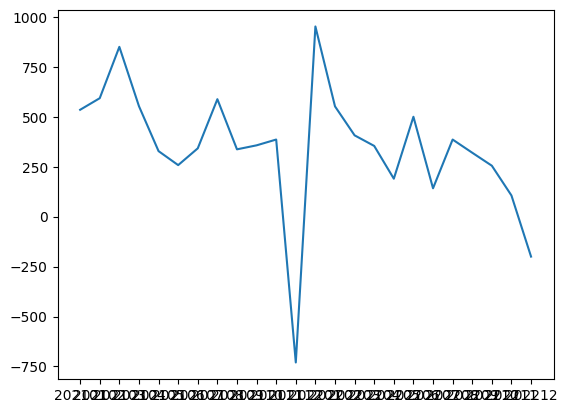

In [10]:
df_p1 = df[['dt_competencia','nr_saldo']]
df_p1['nr_saldo'] = df_p1['nr_saldo'].astype('int') 
df_p1 = df_p1.groupby(by='dt_competencia').sum().reset_index()

x = df_p1['dt_competencia']
y = df_p1['nr_saldo']

plt.plot(x,y)
plt.show()

In [60]:
# ETL: Tratamento para realizar os cálculos
df['nr_salario'] = df['nr_salario'].replace(',','.')
df = df[df['dt_competencia'].isin(['202210','202211','202212'])]

print('---')
total_ds = len(df[df['cd_tipo_movimentacao'].isin(['31','32','33','40','43','45','50','60','80','90','98'])])
print('Total Desligamentos ',total_ds)
df_desligamentos = df[df['cd_tipo_movimentacao'].isin(['40','43','45','90'])]
print('Total Desligamentos indicador ', len(df_desligamentos))
print(len(df_desligamentos)/total_ds)
print('---')
print('---')
total_ad = len(df[df['cd_tipo_movimentacao'].isin(['10','20','25','35','70','97'])])
print('Total Admissões', total_ad)
df_admissoes = df[df['cd_tipo_movimentacao'].isin(['20','25','35','70'])]
print('Total Admissões indicador ', len(df_admissoes))
print(len(df_admissoes)/total_ds)
print('---')
print('Indicador 1: 202210,202211,202212')
MD_DS = df_desligamentos[~df_desligamentos['nr_salario'].isin(['', '.00'])]['nr_salario'].astype('float').mean()
print(MD_DS)
MD_AD = df_admissoes[~df_admissoes['nr_salario'].isin(['', '.00'])]['nr_salario'].astype('float').mean()
print(MD_AD)
print(MD_AD/MD_DS)
print('---')
print('---')
print('Indicador 2: 202210,202211,202212')
TT_AD = total_ad
print(TT_AD)
AD_IG = len(df[df['cd_tipo_movimentacao'].isin(['97'])])
print(AD_IG)
print(AD_IG/TT_AD)
print('---')

---
Total Desligamentos  4376
Total Desligamentos indicador  2752
0.6288848263254113
---
---
Total Admissões 4535
Total Admissões indicador  27
0.006170018281535649
---
Indicador 1: 202210,202211,202212
4583.779031664211
8021.802692307692
1.7500413167593845
---
Indicador 2: 202210,202211,202212
4535
4488
0.9896361631753032
